First create a new virtual environment to overcome packages version conflicts.

In [1]:
# All associated config and frosen model files are in the same folder where the code existis in the external drive

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import cv2

In [5]:
# What is ‘ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt’?
# The mobilenet-ssd model is a Single-Shot multibox Detection (SSD) network, 
# intended to perform object detection. In simple words this file is a pre-trained Tensorflow model and has already been trained on the COCO dataset.

# What is COCO dataset ?
# COCO stands for Common Objects in Context. This dataset contains objects from an everyday context. 
# COCO dataset provides the labeling and segmentation of the objects in the images.

# What do you mean by a frozen graph? 
# What is the significance of ‘frozen_inference_graph.pb’?
# Freezing is the process to identify and save all of required things(graph, weights etc) in a single file that you can easily use.
#Frozen graphs are commonly used for inference in TensorFlow and are stepping stones for inference for other frameworks.

In [6]:
#mobile net is pre-trained model for image recognition and object analysis. It`s frozen model is avilable in public as a .pb 
# file. We have used that, as mentioned below. It required some additional configurations, which is provided by the pbtext file
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [7]:
# What does the .dnn_DetectionModel() do?
# It is a deep neural network model that helps in loading a pretrained model,
# (ssd-mobilenet in our case). The DNN module allows loading pre-trained models of most popular deep learning frameworks,
# including Tensorflow, Caffe, Darknet, Torch.

In [8]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [9]:
# class label file has been downloaded. This is used as enumerator to make the int output provided into text.
# currently, mobile net works for 80 classes. Though we add new classes for the label file, it will not work, hecnce the
# model is not trained
classLabels=[]
file_name="Labels.txt"
with open(file_name, 'rb') as fpt:  # Open the file in binary mode
    labels_bytes = fpt.read()  # Read the bytes
    classLabels = labels_bytes.decode('utf-16').rstrip('\n').split('\n')  # Decode the bytes to string and process as before




In [10]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
# some adjustments are made to the input. Then the captured input will go through these adjustments. Becz, that1s how config
# file is organized and , once satisfying these adjusments only, the model can effectively asses the input images / videos
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001EDB47053B0>

In [12]:
img=cv2.imread('carman.jpg')

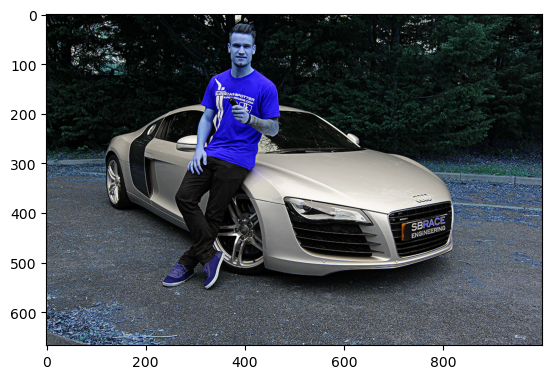

In [13]:
plt.imshow(img) # this is why we need pyplotlib

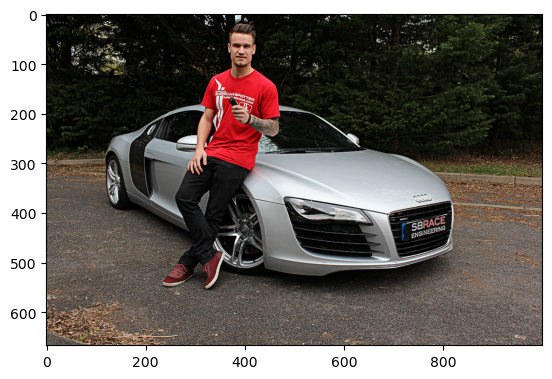

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # some color change filter

In [15]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5) # if the detection confidence is more than 50% display the o/p

In [16]:
print(ClassIndex) # numerical predications of classes. Check with the class label list, strating from 1. Then, those are 
# man and car

[ 3  1 42]


In [17]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN # bounding box text
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    # configuration of bounding box and associated text
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)  

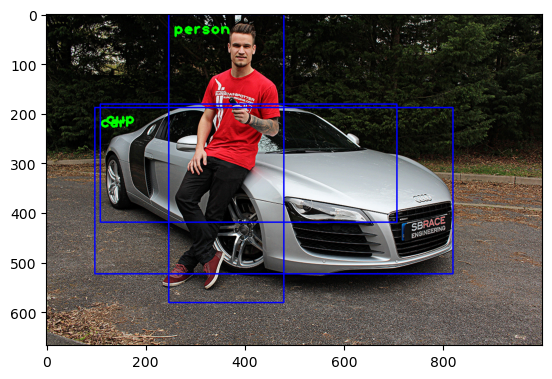

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
# same logic will work for both video and images.
# Type letter q to exist the execution on the image / video canvas

cap=cv2.VideoCapture('video.mp4') # for mp4 video feed  capture

#cap=cv2.VideoCapture(0) # for laptop or web camera capture. For external cameras, this 0 should be changed to 1.
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video / Web Cam")
    
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex))!=0:
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd <80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('Capture',frame)
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        

[3 3 6 3 3 3]
[3 3 3 3 6]
[3 3 3 3 6 3]
[3 3 3 3 3 3]
[3 3 3 3 3 6]
[3 3 3 6 3]
[3 3 3 6 3 3]
[3 3 6 3 3 3]
[6 3 3 3]
[6 3 3 3 3]
[6 3 3 3]
[6 3 3 3]
[6 3 3]
[6 3 3]
[6 3 3]
[3 6 3]
[3 3 6 3]
[3 3 6 3]
[6 3 3 1 3]
[6 3 3 1 3]
[6 3 3 3 1]
[6 3 1 3 3]
[6 3 3 3]
[6 3 3 3]
[6 3 3 3]
[3 6 3 3]
[3 6 3 3]
[3 6 3 3]
[3 6 3 3]
[3 6 3 3]
[3 3 6 1 3]
[3 6 1 3 3]
[3 6 3 1]
[3 3 6 1 3]
[3 3 1 6]
[3 3 1 6]
[3 3 6 1 1 3]
[3 3 1 6 3 3]
[3 1 3 6]
[3 3 1 6 3]
[3 3 1 6]
[3 3 6 3]
[3 3 6]
[3 3 6 3]
[3 3 6 3]
[3 3 6 3]
[3 3 6 3]
[3 3 6 3 1 3 1 3]
[3 3 6 3 3 3]
[3 3 6 1 3]
[3 3 6 1 1 3]
[3 6 3 1 3]
[3 1 6 3 3]
[1 3 3 6 3]
[1 3 6 3 3]
[1 3 6 3 1 3 3 3]
[1 1 3 3 6 3 3 3]
[1 1 3 3 6 3 1 3]
[1 3 1 3 6 3 3]
[3 1 1 3 6 3 3]
[1 3 6 3 3 3 3]
[3 1 3 6 3 3 3]
[3 3 1 6 1 3 3 1]
[1 3 3 6 3 3 3]
[1 6 3 3 3 3 3]
[1 6 3 3 3 3]
[1 6 3 3 3 3]
[1 6 3 3 3 3]
[1 6 3 3 3 3]
[1 6 3 3 3 3]
[6 1 3 3 3 3]
[1 6 1 3 3 3 3 3]
[1 6 3 3 3 3]
[1 6 3 3 3 3]
[1 3 3 6 3 3]
[1 3 3 6 3 3]
[1 3 3 6 3 3]
[1 3 3 6 3 3 3]
[1 3 3 6 3 3 1]
[1 3 3 6

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
